# In this notebook I create the dndz fits file from the BOSS catalogues 
I need it to use the Euclid code of the Power Spectrum

The fits file is structured in 4 table: z_lower, z_center and z_upper which is the lower, center and the upper value of z of the redshift bins.

the fourth table is the distribution of galaxy normalized by the Area of the survey and the width of redshift bins.

In [65]:
from astropy.io import fits
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt

Values of the Area of the survey in $deg^2$ ( Reid et al 2015)

In [66]:
areaN_low = 6851
areaN_high = 6851
areaS_low = 2525
areaS_high = 2501

In [67]:
def write_header(hdu, filename, area):
    hdu.name = 'CATALOG'
    hdu.header["EXTNAME"] = 'CATALOG '
    hdu.header["FILENAME"] = filename
    hdu.header["TELESCOP"] = 'BOSS '
    hdu.header["INSTRUME"] = "BOSS DR12"
    hdu.header["CAT_TYPE"] = 'NOT_PROXY'
    hdu.header["CAT_NAME"] = ""
    hdu.header["COORD"] = "PSEUDO_EQUATORIAL"
    hdu.header["ANGLE"] = "DEG"
    hdu.header["SELECT"] = "EUCLIDLIKE"
    hdu.header["AREA"] = area # deg^2 to find for BOSS

# start with the north high z catalog

In [68]:
filename = '../../BOSS_North/galaxy_North_high_C.fits'

In [69]:
hdul = fits.open(filename)
dataN_high = hdul[1].data

In [70]:
#number density of galaxy z high
#I take this value from the catalog without cuts
filename = '../../BOSS_North/galaxy_DR12v5_CMASSLOWZTOT_North.fits'
hdul = fits.open(filename)
dataN_tot = hdul[1].data

In [71]:
nz = dataN_tot['NZ']

In [72]:
z = dataN_tot['Z']

In [73]:
z.min(), z.max()

(-0.011446905, 1.0021657)

In [74]:
z.sort()

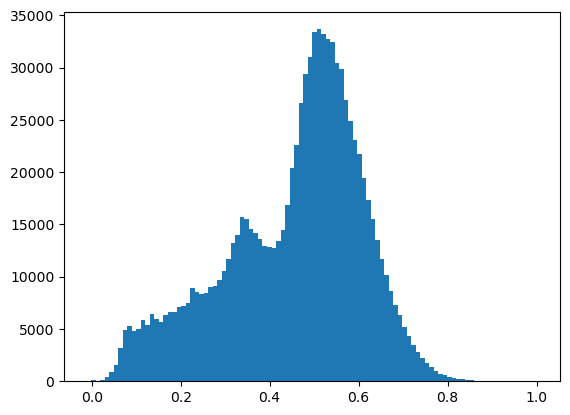

In [75]:
_=plt.hist(z, bins=100)

The histogram divides the redshift total range in bins, with width that depends on the number of bins (in this case in 100 bins). The greater collection of redshift is in the range from 0.5 to 0.6. 

In [76]:
#I have to binnibg the z values
n_hist, edge = np.histogram(z, bins=100) #it returns the number of galaxies in each bin and the edges of the bins

In [77]:
edge[1] - edge[0]

0.010136126

The width of the bins is dz = 0.01

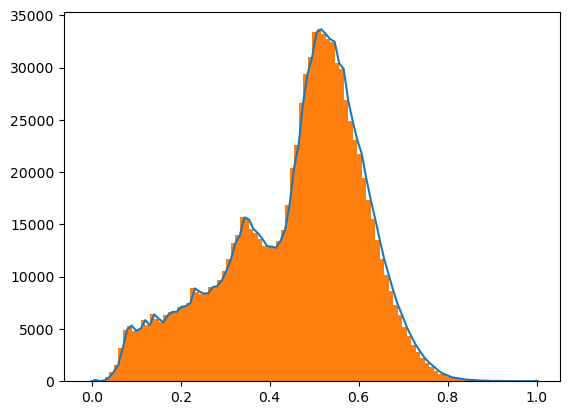

In [78]:
plt.plot(edge[1:], n_hist)
_=plt.hist(z, bins=100)

In [79]:
dz = edge[100]-edge[99]

In [80]:
dz

0.0101361275

In [81]:
#compute center of bins
z_center = edge[:-1]+dz/2

In [82]:
#I have to create an array containing the lower and upper edge of the bins
z_low = edge[:-1]
z_high = edge[1:]

In [83]:
z_low, z_high

(array([-0.01144691, -0.00131078,  0.00882535,  0.01896147,  0.0290976 ,
         0.03923373,  0.04936985,  0.05950598,  0.0696421 ,  0.07977822,
         0.08991435,  0.10005048,  0.11018661,  0.12032273,  0.13045886,
         0.14059499,  0.1507311 ,  0.16086723,  0.17100336,  0.18113948,
         0.19127561,  0.20141174,  0.21154787,  0.221684  ,  0.23182012,
         0.24195623,  0.25209236,  0.2622285 ,  0.27236462,  0.28250074,
         0.29263687,  0.302773  ,  0.31290913,  0.32304525,  0.33318138,
         0.3433175 ,  0.35345364,  0.36358976,  0.37372586,  0.383862  ,
         0.39399812,  0.40413424,  0.41427037,  0.4244065 ,  0.43454263,
         0.44467875,  0.45481488,  0.464951  ,  0.47508714,  0.48522326,
         0.4953594 ,  0.5054955 ,  0.5156316 ,  0.52576774,  0.5359039 ,
         0.54604   ,  0.5561761 ,  0.56631225,  0.5764484 ,  0.5865845 ,
         0.59672064,  0.60685676,  0.6169929 ,  0.627129  ,  0.63726515,
         0.6474013 ,  0.6575374 ,  0.6676735 ,  0.6

In [84]:
z_center

array([-0.00637884,  0.00375728,  0.01389341,  0.02402954,  0.03416566,
        0.04430179,  0.05443791,  0.06457404,  0.07471017,  0.08484629,
        0.09498242,  0.10511854,  0.11525467,  0.1253908 ,  0.13552693,
        0.14566305,  0.15579917,  0.1659353 ,  0.17607142,  0.18620755,
        0.19634368,  0.2064798 ,  0.21661593,  0.22675206,  0.23688819,
        0.2470243 ,  0.25716043,  0.26729655,  0.27743268,  0.2875688 ,
        0.29770494,  0.30784106,  0.3179772 ,  0.32811332,  0.33824944,
        0.34838557,  0.3585217 ,  0.36865783,  0.37879393,  0.38893005,
        0.39906618,  0.4092023 ,  0.41933843,  0.42947456,  0.4396107 ,
        0.44974682,  0.45988294,  0.47001907,  0.4801552 ,  0.49029133,
        0.5004275 ,  0.51056355,  0.5206997 ,  0.5308358 ,  0.54097193,
        0.55110806,  0.5612442 ,  0.5713803 ,  0.58151644,  0.5916526 ,
        0.6017887 ,  0.6119248 ,  0.62206095,  0.6321971 ,  0.6423332 ,
        0.65246934,  0.66260546,  0.6727416 ,  0.6828777 ,  0.69

In [85]:
z_center[10]-z_center[9]

0.0101361275

Now built the catalogs

First of all I modify the galaxy and random catalog adding the AREA

In [14]:
#firs read the catalog
filename = '../BOSS_North/galaxy_North_high_C.fits'
hdul = fits.open(filename)
dataN_high = hdul[1].data

In [15]:
dataN_high.names

['RA', 'DEC', 'REDSHIFT', 'WEIGHT_CP', 'WIGHT_Z', 'WEIGHT_STAR', 'WEIGHT_TOT']

In [16]:
ra = dataN_high['RA']
dec = dataN_high['DEC']
z = dataN_high['REDSHIFT']
w_cp = dataN_high['WEIGHT_CP']  
w_noz = dataN_high['WIGHT_Z']
w_star = dataN_high['WEIGHT_STAR']
w_tot = dataN_high['WEIGHT_TOT']

In [17]:
z.min(), z.max()

(0.5000008940696716, 0.7499985694885254)

In [59]:
#t = fits.BinTableHDU(Table([ra, dec, z, w_cp, w_noz, w_star, w_tot], names=('RA', 'DEC', 'REDSHIFT', 'WEIGHT_CP', 'WIGHT_Z', 'WEIGHT_STAR', 'WEIGHT_TOT')))
#write_header(t, filename.split("/")[-1], areaN_high)
#t.writeto(filename, overwrite=True)

Repeat for the low z

In [7]:
filename = '../BOSS_North/galaxy_DR12v5_CMASSLOWZTOT_North.fits'
hdul = fits.open(filename)
data = hdul[1].data

In [8]:
dataN_z1 = data[(data['Z'] >= 0.2) & (data['Z']<=0.5)]

In [9]:
dataN_z1['Z'].min(), dataN_z1['Z'].max()

(0.20000201, 0.49999955)

In [10]:
z = dataN_z1['Z']
w_fkp = dataN_z1['WEIGHT_FKP']

In [12]:
ra_low = np.load('../cose_utili/galaxy_North_ra_low.npy')
dec_low = np.load('../cose_utili/galaxy_North_dec_low.npy')
w_cp_low = np.load('../cose_utili/galaxy_North_w_cp_low.npy')
w_noz_low = np.load('../cose_utili/galaxy_North_w_z_low.npy')
w_temp = np.load('../cose_utili/galaxy_North_w_temp_low.npy')
w_tot_low = np.load('../cose_utili/galaxy_North_w_tot_low.npy')

In [13]:
newfilename= '../BOSS_North/galaxy_North_low_C.fits'

In [14]:
z.size

429182

In [15]:
ra=dataN_z1['RA']
dec=dataN_z1['DEC']

In [16]:
w_noz_low.size

429182

In [17]:
w_star =dataN_z1['WEIGHT_STAR']

In [19]:
t = fits.BinTableHDU(Table([ra, dec, z, w_cp_low, w_noz_low, w_star, w_fkp, w_fkp*w_tot_low, w_tot_low], names=('RA', 'DEC', 'REDSHIFT', 'WEIGHT_CP', 'WIGHT_Z', 'WEIGHT_STAR', 'WEIGHT_FKP' , 'WEIGHT_TOT_FKP','WEIGHT_TOT')))
write_header(t, newfilename.split("/")[-1], areaN_low)
t.writeto(newfilename, overwrite=True)

Now for the random

In [16]:
filename = '../BOSS_North/random0_DR12v5_CMASSLOWZTOT_North.fits'
hdul = fits.open(filename)
data = hdul[1].data

In [17]:
dataN_z1 = data[(data['Z'] >= 0.2) & (data['Z']<=0.5)]

In [28]:
filename = '../BOSS_North/random0_North_low_C.fits'
hdul = fits.open(filename)
dataN_high = hdul[1].data


In [20]:
ra = dataN_z1['RA']
dec = dataN_z1['DEC']
z = dataN_z1['Z']
w_fkp = dataN_z1['WEIGHT_FKP']

In [21]:
z.min(), z.max()

(0.2000020146369934, 0.4999995529651642)

In [22]:
newfilename= '../BOSS_North/random0_North_low_C.fits'

In [23]:
t = fits.BinTableHDU(Table([ra, dec, z, w_fkp], names=('RA', 'DEC', 'REDSHIFT', 'WEIGHT_FKP')))
write_header(t, newfilename.split("/")[-1], areaN_high)
t.writeto(newfilename, overwrite=True)

In [68]:
filename = '../BOSS_North/random0_North_low_C.fits'
hdul = fits.open(filename)
dataN_low = hdul[1].data

In [69]:
ra = dataN_low['RA']
dec = dataN_low['DEC']
z = dataN_low['REDSHIFT']

In [70]:
#t = fits.BinTableHDU(Table([ra, dec, z], names=('RA', 'DEC', 'REDSHIFT')))
#write_header(t, filename.split("/")[-1], areaN_low)
#t.writeto(filename, overwrite=True)

Finally, create the dndz.fits file

check the header

In [22]:
dz = edge[100]-edge[99]

In [23]:
dz

0.0101361275

In [24]:
z_center = edge[:-1]+dz/2
z_low = edge[:-1]
z_high = edge[1:]

In [27]:
galaxy_density = n_hist / (areaN_high * dz)

In [19]:
def write_header_dndz(hdu):
    hdu.name = 'DN_DZ'
    hdu.header["EXTNAME"] = 'DN_DZ '
    #hdu.header["FILENAME"] = filename
    #hdu.header["TELESCOP"] = 'BOSS '
    #hdu.header["INSTRUME"] = "BOSS DR12"
    #hdu.header["CAT_TYPE"] = 'NOT_PROXY'
    #hdu.header["CAT_NAME"] = ""
    #hdu.header["COORD"] = "PSEUDO_EQUATORIAL"
    #hdu.header["ANGLE"] = "DEG"
    #hdu.header["SELECT"] = "EUCLIDLIKE"
    #hdu.header["AREA"] = area # deg^2 to find for BOSS

In [31]:
t = fits.BinTableHDU(Table([z_center, z_low, z_high, galaxy_density], names=('Z', 'Z_LOW', 'Z_HIGH', 'GALAXY_DENSITY')))
write_header_dndz(t)
t.writeto('../BOSS_North/dndz_North_C_2.fits', overwrite=True)

In [3]:
filename = '../BOSS_North/dndz_North_C.fits'

In [4]:
hdul = fits.open(filename)
data = hdul[1].data

In [5]:
data.names

['Z', 'Z_LOW', 'Z_HIGH', 'GALAXY_DENSITY']

In [6]:
#print data
print(data.names)
print(data)

['Z', 'Z_LOW', 'Z_HIGH', 'GALAXY_DENSITY']
[(0.10350269, 0.10000271, 0.10700268,   0.      )
 (0.11050266, 0.10700268, 0.11400265,   0.      )
 (0.11750263, 0.11400265, 0.12100262,   0.      )
 (0.12450261, 0.12100262, 0.12800258,   0.      )
 (0.13150257, 0.12800258, 0.13500257,   0.      )
 (0.13850255, 0.13500257, 0.14200254,   0.      )
 (0.14550252, 0.14200254, 0.1490025 ,   0.      )
 (0.15250249, 0.1490025 , 0.15600248,  15.057944)
 (0.15950246, 0.15600248, 0.16300245,  14.803774)
 (0.16650243, 0.16300245, 0.17000242,  18.395784)
 (0.1735024 , 0.17000242, 0.17700239,  23.906853)
 (0.18050237, 0.17700239, 0.18400235,  24.692078)
 (0.18750234, 0.18400235, 0.19100234,  27.12813 )
 (0.19450232, 0.19100234, 0.19800231,  29.58797 )
 (0.2015023 , 0.19800231, 0.20500228,  32.959038)
 (0.20850226, 0.20500228, 0.21200225,  33.193336)
 (0.21550223, 0.21200225, 0.21900222,  35.833416)
 (0.2225022 , 0.21900222, 0.22600219,  42.930424)
 (0.22950217, 0.22600219, 0.23300216,  43.03247 )
 (0.236

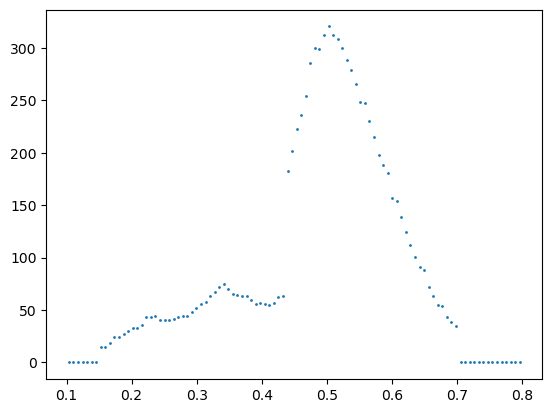

In [7]:
plt.plot(data['Z'], data['GALAXY_DENSITY'], 'o', markersize=1)

## South Catalog

In [10]:
filename = '../BOSS_South/galaxy_DR12v5_CMASSLOWZTOT_South.fits'

In [11]:
hdul = fits.open(filename)
data = hdul[1].data

In [12]:
nz, edge = np.histogram(data['Z'], bins=100)

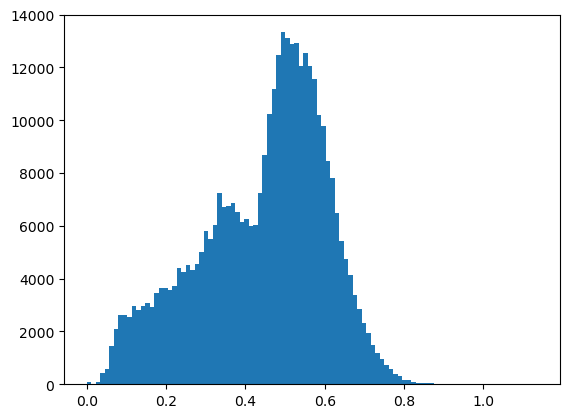

In [13]:
_=plt.hist(data['Z'], bins=100) 

In [14]:
z_upp = edge[1:]
z_low = edge[:-1]
z_center = z_low + (z_upp - z_low)/2

In [15]:
dz = edge[1]-edge[0]

In [18]:
galaxy_density = nz / (areaS_high * dz)

In [21]:
t = fits.BinTableHDU(Table([z_center, z_low, z_upp, galaxy_density], names=('Z', 'Z_LOW', 'Z_HIGH', 'GALAXY_DENSITY')))
write_header_dndz(t)
t.writeto('../BOSS_North/dndz_South_C.fits', overwrite=True)